# Todos
## Concrete
* Split up into several notebooks
* Compare star 1 high-transfer and star 1 low-transfer => have the same number of switched-out items
* Figure out why stars differ in difficulty
* Add more group-level analyses
* Z-score rt_zigzag within blocks (avoid capturing just absolute RT differences over time)
* {New notebook}: Load questionnaire, relate subject IDs, look at differences
    * Do people perform better who noticed the rule switches (questionnaire)? Who counted the number of distinct rules correctly? 
    * Make sure which hand they use (questionnaire) doens't impact data
    * Exclude participant who used pen & paper
    * Add qualtrix IDs (6-digit numbers)
* CHECK Talk to Aram
    * CHECK Want to continue? Your tasks will be ...
* CHECK Look at block order column
* CHECK Add question to qualtrix: Did you use pen & paper or other device?
* CHECK Add star iteration (star 1, 2, ..., 9)
* CHECK Add block order column (high_low or low_high?)

## Abstract
* Read papers to come up with more ideas!!!
* Can I predict transfer performance from learning patterns?
    * Little RT zigzag at the end -> Petrified building blocks, which are hard to unlearn -> Bad performance in low transfer
    * Little RT zigzag at the end -> Petrified building blocks, which are stable and present -> Good performance in high transfer
* How to set up the classical regression (predicting choices from previous choices and outcomes)?
* Check mTurk exclusion criterion and update here in the code when finding chance-performers (25?)
* Baseline computational model: random number generator (OR strategic exploration); until it hits a sequence, then repeats this as long as it works
* Test this idea: Random exploration = no RT zigzag; searching for middle-layer items = heavy RT zigzag; using middle-layer items during exploration = heavy RT zigzag; found goal stars & exploiting them = no zigzag any more

# Imports etc.

In [1]:
import json
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)
default_figure_size = (6.4, 4.8)

In [2]:
# data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1'
data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34'
plot_dir = data_dir + 'figures'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

## Get all_data

In [3]:
rule_data = pd.read_csv(os.path.join(data_dir, 'rule_data.csv'), index_col=0)
rule_data.loc[rule_data.phase == 'high'][:30]

sid phase  goal_id lowRules highRules lowTransferRules  \
0   13885  high        0   [0, 1]    [3, 0]              NaN   
3   14239  high        0   [3, 0]    [1, 0]              NaN   
4   16849  high        0   [1, 2]    [3, 0]              NaN   
7   23638  high        0   [0, 1]    [0, 2]              NaN   
8   24817  high        0   [3, 0]    [2, 0]              NaN   
10  24964  high        0   [2, 3]    [1, 0]              NaN   
13  24979  high        0   [2, 3]    [3, 2]              NaN   
15  26230  high        0   [2, 3]    [2, 0]              NaN   
16  26641  high        0   [1, 2]    [2, 1]              NaN   
19  26770  high        0   [0, 1]    [1, 3]              NaN   
21  26899  high        0   [1, 2]    [1, 3]              NaN   
22  27517  high        0   [2, 3]    [1, 2]              NaN   
24  28033  high        0   [0, 1]    [2, 0]              NaN   
26  28525  high        0   [3, 0]    [2, 1]              NaN   
29  31306  high        0   [3, 0]    [2, 1]              NaN   
30  31552  high        0   [1, 2]    [0, 1]              NaN   
32  31684  high        0   [2, 3]    [2, 0]              NaN   
35  31951  high        0   [1, 2]    [0, 1]              NaN   
36  32713  high        0   [3, 0]    [3, 0]              NaN   
38  32833  high        0   [0, 1]    [2, 3]              NaN   
41  33406  high        0   [3, 0]    [3, 2]              NaN   
43  33970  high        0   [1, 2]    [1, 2]              NaN   
44  34393  high        0   [2, 3]    [1, 3]              NaN   
46  34660  high        0   [3, 0]    [2, 1]              NaN   
48  35137  high        0   [1, 2]    [1, 2]              NaN   
50  35161  high        0   [3, 0]    [1, 2]              NaN   
53  35386  high        0   [0, 1]    [0, 3]              NaN   
54  35437  high        0   [2, 3]    [2, 3]              NaN   
57  36394  high        0   [3, 0]    [0, 3]              NaN   
59  36718  high        0   [3, 0]    [0, 1]              NaN   

   highTransferRules lowRulesBoth lowRulesLearnOnly lowRulesTransferOnly  \
0             [3, 0]       [0, 1]               NaN                  NaN   
3             [1, 3]       [3, 0]               NaN                  NaN   
4             [2, 0]       [1, 2]               NaN                  NaN   
7             [0, 2]       [0, 1]               NaN                  NaN   
8             [2, 3]       [3, 0]               NaN                  NaN   
10            [1, 0]       [2, 3]               NaN                  NaN   
13            [3, 2]       [2, 3]               NaN                  NaN   
15            [2, 0]       [2, 3]               NaN                  NaN   
16            [2, 1]       [1, 2]               NaN                  NaN   
19            [2, 3]       [0, 1]               NaN                  NaN   
21            [1, 3]       [1, 2]               NaN                  NaN   
22            [1, 0]       [2, 3]               NaN                  NaN   
24            [2, 0]       [0, 1]               NaN                  NaN   
26            [2, 1]       [3, 0]               NaN                  NaN   
29            [0, 1]       [3, 0]               NaN                  NaN   
30            [0, 3]       [1, 2]               NaN                  NaN   
32            [2, 0]       [2, 3]               NaN                  NaN   
35            [0, 2]       [1, 2]               NaN                  NaN   
36            [3, 2]       [3, 0]               NaN                  NaN   
38            [2, 1]       [0, 1]               NaN                  NaN   
41            [0, 2]       [3, 0]               NaN                  NaN   
43            [1, 2]       [1, 2]               NaN                  NaN   
44            [1, 0]       [2, 3]               NaN                  NaN   
46            [0, 1]       [3, 0]               NaN                  NaN   
48            [1, 2]       [1, 2]               NaN                  NaN   
50            [1, 2]       [3, 0]            

In [4]:
interesting_cols = [
#     'sid',
    'trial_type', 'phase', 'block', 'trial', 'trial_', 'subtrial', 'points', 'rt', #'key_press',
    'action_id', 'action_name', 'middle_item', 'middle_item_name', 'goal_star', 'goal_star_name', 'correct', 'unlocked_star',
    'unlocked_star_name', 'timeout', 'star_iteration',
#     'middle_item_lowTransferRules', 'middle_item_lowRules', 'bool_middle_item_lowRules',
#     'unlocked_star_highTransferRules', 'unlocked_star_highRules', 'bool_unlocked_star_highRules',
    'chance_performer',
]

In [5]:
all_data = pd.read_csv(os.path.join(data_dir, 'all_data.csv'), index_col=0)
incl_data = all_data.loc[np.invert(all_data.chance_performer) & np.invert(all_data.inattentives)]
all_data

rt  stimulus  key_press trial_type  trial_index  time_elapsed  \
0        797.865         0       85.0   learning          297       2422963   
1        654.720         0       73.0   learning          298       2423619   
2       1317.900         0       79.0   learning          299       2424938   
3        276.305         0       80.0   learning          300       2425216   
4        823.310         0       85.0   learning          302       2426546   
...          ...       ...        ...        ...          ...           ...   
237268   193.665         0       80.0   transfer         5315       1992663   
237269   134.030         0       80.0   transfer         5317       1993311   
237270   101.775         0       85.0   transfer         5318       1993420   
237271    93.150         0       73.0   transfer         5319       1993520   
237272   156.700         0       80.0   transfer         5320       1993684   

       internal_node_id phase  block  trial  ...  \
0          0.0-77.0-0.0  high    0.0    0.0  ...   
1          0.0-77.0-1.0  high    0.0    0.0  ...   
2          0.0-77.0-2.0  high    0.0    0.0  ...   
3          0.0-77.0-3.0  high    0.0    0.0  ...   
4          0.0-78.0-0.0  high    0.0    1.0  ...   
...                 ...   ...    ...    ...  ...   
237268   0.0-1118.0-3.0   low    7.0   23.0  ...   
237269   0.0-1119.0-0.0   low    7.0   24.0  ...   
237270   0.0-1119.0-1.0   low    7.0   24.0  ...   
237271   0.0-1119.0-2.0   low    7.0   24.0  ...   
237272   0.0-1119.0-3.0   low    7.0   24.0  ...   

        bool_unlocked_star_highRulesLearnOnly  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
237268                                      0   
237269                                      0   
237270                                      0   
237271                                      0   
237272                                      0   

        bool_unlocked_star_highRulesTransferOnly    log_rt      z_rt  \
0                                              0  6.683192  1.325479   
1                                              0  6.485734  1.001916   
2                                              0  7.184553  2.147032   
3                                              0  5.625118 -0.408328   
4                                              0  6.714547  1.376858   
...                                          ...       ...       ...   
237268                                         0  5.271280  0.013623   
237269                                         0  4.905497 -0.362680   
237270                                         0  4.632542 -0.643485   
237271                                         0  4.544889 -0.733659   
237272                                         0  5.060694 -0.203019   

        rt_zz_low  rt_zz_high  chance_performer  inattentives  psych_disorder  \
0        2.878924    2.878924             False         False           False   
1        2.878924    2.878924             False         False           False   
2        2.878924    2.878924             False         False           False   
3        2.878924    2.878924             False         False           False   
4        2.448594    2.448594             False         False           False   
...           ...         ...               ...           ...             ...   
237268  -0.223933   -0.223933             False         False           False   
237269  -0.249835   -0.249835             False         False           False   
237270  -0.249835   -0.249835             False         False           False   
237271  -0.249835   -0.249835             False         False           False   
237272  -0.249835   -0.249835             False         False           False   

        head_

## Make other dataframes

In [6]:
# rt_sum
def get_rt_sum(data, id_cols):
    
    rt_sum_dat_subtrial = data.groupby(id_cols + ['subtrial']).aggregate('mean').reset_index()[id_cols + ['subtrial', 'rt']]
    rt_sum_dat = data.groupby(id_cols).aggregate('mean').reset_index()[id_cols + ['rt', 'acc']]
    rt_sum_dat = rt_sum_dat.rename(columns={'rt': 'mean_rt'})

    rt_sum = pd.merge(rt_sum_dat, rt_sum_dat_subtrial, on=id_cols)
    rt_sum['rt_delta'] = rt_sum['rt'] - rt_sum['mean_rt']
    
    return rt_sum

# # Example use
# get_rt_sum(incl_data, id_cols=['sid', 'phase', 'trial_type'])

In [7]:
def rt_sum2zigzag(rt_sum, id_cols):
    
    rt_wide = rt_sum.pivot_table(index=id_cols + ['acc'], columns='subtrial', values='rt_delta').reset_index()
    rt_wide = rt_wide.rename(columns={i: 'rt_delta_{}'.format(i) for i in range(4)})
    rt_wide['rt_zigzag'] = rt_wide['rt_delta_0'] - rt_wide['rt_delta_1'] + rt_wide['rt_delta_2'] - rt_wide['rt_delta_3']
    
    return rt_wide

# # Example use
# rt_sum2zigzag(rt_sum, id_cols=['sid', 'phase', 'trial_type'])

In [8]:
def add_info_to_rt_wide(rt_wide, id_cols, all_data):
    
    add_dat = all_data.groupby(id_cols).aggregate('mean').reset_index()[
        id_cols + [
            'goal_star', 'star_iteration',  # Only meaningful for rt_wide_block
            'rt',
            'bool_middle_item_lowRulesLearnOnly', 'bool_middle_item_lowRulesTransferOnly',
            'bool_unlocked_star_highRulesLearnOnly', 'bool_unlocked_star_highRulesTransferOnly',
        ]]
    
    rt_wide = pd.merge(rt_wide, add_dat, on=id_cols)
    
    return rt_wide

# # Example use
# id_cols = ['sid', 'phase', 'trial_type', 'block']
# add_info_to_rt_wide(rt_wide_block, id_cols, all_data)

In [9]:
# Get rt_sum
id_cols = ['sid', 'chance_performer', 'phase', 'phaseNum', 'trial_type']
rt_sum = get_rt_sum(incl_data, id_cols)
rt_wide = rt_sum2zigzag(rt_sum, id_cols)
rt_wide = add_info_to_rt_wide(rt_wide, id_cols, all_data).drop(columns=['goal_star', 'star_iteration'], axis=1)
rt_wide

sid  chance_performer phase  phaseNum trial_type       acc  rt_delta_0  \
0    13885             False  high       0.0   learning  0.423333   55.706296   
1    13885             False  high       0.0   transfer  0.402010   49.733178   
2    13885             False   low       1.0   learning  0.496667   90.782438   
3    13885             False   low       1.0   transfer  0.542714   48.385854   
4    16849             False  high       0.0   learning  0.407018  232.506847   
..     ...               ...   ...       ...        ...       ...         ...   
199  39508             False   low       1.0   transfer  0.092308   26.749064   
200  39520             False  high       0.0   learning  0.318792  124.028469   
201  39520             False  high       0.0   transfer  0.255000  130.101313   
202  39520             False   low       1.0   learning  0.600671   95.848779   
203  39520             False   low       1.0   transfer  0.456853  173.851212   

     rt_delta_1  rt_delta_2  rt_delta_3   rt_zigzag          rt  \
0   -105.507071  149.392146  -99.591371  410.196883  232.329371   
1    -46.043982  133.745716 -137.434912  366.957789  256.128254   
2   -111.404446  160.143854 -139.521846  501.852583  230.860579   
3    -93.681784  129.202739  -83.906809  355.177186  192.333844   
4   -134.920940   31.695077 -130.439204  529.562068  336.205853   
..          ...         ...         ...         ...         ...   
199 -140.298910  258.228449 -144.678603  569.955026  352.543628   
200 -110.666514   68.962328  -82.324283  385.981594  257.854635   
201 -121.623687   63.087938  -71.565563  386.378500  243.221762   
202  -98.325164   75.663427  -73.187043  343.024413  207.056271   
203 -102.698991   33.891136 -105.043357  415.484695  273.006428   

     bool_middle_item_lowRulesLearnOnly  \
0                              0.000000   
1                              0.000000   
2                              0.206667   
3                              0.026349   
4                              0.000000   
..                                  ...   
199                            0.040764   
200                            0.000000   
201                            0.000000   
202                            0.238693   
203                            0.044248   

     bool_middle_item_lowRulesTransferOnly  \
0                                 0.000000   
1                                 0.000000   
2                                 0.006667   
3                                 0.253450   
4                                 0.000000   
..                                     ...   
199                               0.121019   
200                               0.000000   
201                               0.000000   
202                               0.022613   
203                               0.230088   

     bool_unlocked_star_highRulesLearnOnly  \
0                                 0.071667   
1                                 0.020075   
2                                 0.000000   
3                                 0.000000   
4                                 0.074266   
..                                     ...   
199                               0.000000   
200                               0.058626   
201                               0.028750   
202                               0.000000   
203                               0.000000   

     bool_unlocked_star_highRulesTransferOnly  
0                                    0.005833  
1                                    0.110414  
2                                    0.000000  
3                                    0.000000  
4                                    0.007772  
..                                        ...  
199                                  0.000000  
200                                  0.004188  
201                                  0.078750  
202                                  0.000000  
203                                  0.000000  

[204 rows x 16 columns]

In [10]:
# Get rt_sum_block
id_cols = ['sid', 'chance_performer', 'phase', 'phaseNum', 'trial_type', 'block']
rt_sum_block = get_rt_sum(all_data, id_cols)
rt_wide_block = rt_sum2zigzag(rt_sum_block, id_cols)
rt_wide_block = add_info_to_rt_wide(rt_wide_block, id_cols, all_data)
rt_wide_block

sid  chance_performer phase  phaseNum trial_type  block       acc  \
0     13885             False  high       0.0   learning    0.0  0.000000   
1     13885             False  high       0.0   learning    1.0  0.920000   
2     13885             False  high       0.0   learning    2.0  0.000000   
3     13885             False  high       0.0   learning    3.0  0.880000   
4     13885             False  high       0.0   learning    4.0  0.000000   
...     ...               ...   ...       ...        ...    ...       ...   
2395  39520             False   low       1.0   transfer    3.0  0.720000   
2396  39520             False   low       1.0   transfer    4.0  0.640000   
2397  39520             False   low       1.0   transfer    5.0  0.000000   
2398  39520             False   low       1.0   transfer    6.0  0.608696   
2399  39520             False   low       1.0   transfer    7.0  0.400000   

      rt_delta_0  rt_delta_1  rt_delta_2  rt_delta_3   rt_zigzag  goal_star  \
0      51.791250 -141.787350  288.892850 -198.896750  681.368200        3.0   
1      51.349650  -41.676750   13.661450  -23.334350  130.022200        2.0   
2     111.359800  -90.893400  107.660400 -128.126800  438.040400        1.0   
3      71.007150  -86.468650   76.663350  -61.201850  295.341000        0.0   
4      76.294250 -130.946150  215.256050 -160.604150  583.100600        1.0   
...          ...         ...         ...         ...         ...        ...   
2395   37.996000  -65.110000  -28.352800   55.466800   19.286400        2.0   
2396   87.478650  -45.979550   21.475850  -62.974950  217.909000        1.0   
2397  171.475573  -88.797344   88.152031 -170.830260  519.255208        2.0   
2398  171.662500  -87.958152  -25.490761  -58.213587  292.343478        1.0   
2399  270.887300 -200.332300  156.437500 -226.992500  854.649600        2.0   

      star_iteration          rt  bool_middle_item_lowRulesLearnOnly  \
0                0.0  435.669550                            0.000000   
1                0.0  168.506950                            0.000000   
2                0.0  302.238400                            0.000000   
3                0.0  162.112450                            0.000000   
4                1.0  273.433750                            0.000000   
...              ...         ...                                 ...   
2395             1.0  156.081000                            0.040000   
2396             2.0  173.663350                            0.010000   
2397             2.0  337.639219                            0.041237   
2398             2.0  226.367283                            0.021277   
2399             2.0  351.368300                            0.020000   

      bool_middle_item_lowRulesTransferOnly  \
0                                  0.000000   
1                                  0.000000   
2                                  0.000000   
3                                  0.000000   
4                                  0.000000   
...                                     ...   
2395                               0.200000   
2396                               0.350000   
2397                               0.092784   
2398                               0.319149   
2399                               0.150000   

      bool_unlocked_star_highRulesLearnOnly  \
0                                      0.02   
1                                      0.23   
2                                      0.01   
3                                      0.00   
4                                      0.01   
...                                     ...   
2395                                   0.00   
2396                                   0.00   
2397                                   0.00   
2398                                   0.00   
2399                                   0.00   

      bool_unlocked_star_highRulesTransferOnly  
0                                         0.00  
1                                        

# Results

## Data overview

In [11]:
id_cols = ['sid', 'trial_type', 'phase']
all_data[interesting_cols + id_cols].groupby(id_cols[0]).mean()

block      trial      trial_  subtrial      points          rt  \
sid                                                                        
13885  4.702554  12.012018  129.575864  1.499249  232.461943  228.658259   
14239  4.695893  12.032502  129.429831  1.494331   66.400605  324.670460   
16849  4.724689  11.996448  130.113677  1.491500  262.510023  298.514588   
23638  4.705868  12.025577  129.672267  1.498495  266.354313  252.551392   
24817  4.700000  12.000000  129.500000  1.500000  234.309500  308.360629   
24964  4.700000  12.000000  129.500000  1.500000   61.215000  344.055750   
24979  4.698798  12.005258  129.475213  1.499249  303.592138  275.202999   
26230  4.700300  12.002253  129.509765  1.499249  213.153230  300.602105   
26641  4.697266  11.989466  129.421119  1.498119  229.024580  241.315068   
26770  4.706267  12.030204  129.686886  1.496602  175.606343  186.084666   
26899  4.711669  12.017315  129.809034  1.498118  293.733501  239.697005   
27517  4.696581  12.000251  129.414781  1.496732   91.486425  207.057636   
28033  4.701579  12.008269  129.547732  1.498872  211.252067  324.606662   
28525  4.699549  11.999249  129.487982  1.499249  151.197046  234.792682   
31306  4.766738  12.150372  131.318810  1.464134  151.781615  345.577111   
31552  4.696773  12.002252  129.421566  1.499625  190.295472  202.446340   
31684  4.674225  12.026583  128.882200  1.476935   52.704196  280.131706   
31951  4.698047  11.993991  129.445168  1.499249   77.555333  156.072914   
32713  4.713712  12.033149  129.875942  1.497740  272.154445  290.803571   
32833  4.729951  11.961312  130.210095  1.487317  231.076352  292.480693   
33406  4.697704  11.986122  129.428716  1.495079  211.711834  318.539747   
33970  4.707329  12.045934  129.729167  1.497741  222.852661  285.970093   
34393  4.708564  12.005793  129.719899  1.495214  176.045088  337.001604   
34660  4.720403  12.046851  130.056927  1.496222  243.596725  296.950585   
35137  4.706104  12.042703  129.695303  1.497362  161.622708  276.733822   
35161  4.724024  12.015459  130.116067  1.492651  206.556006  354.066729   
35386  4.709677  12.038306  129.780242  1.495464  160.153730  382.166077   
35437  4.679612  12.092233  129.082524  1.487481  127.234032  228.109011   
36394  4.705558  11.985729  129.624687  1.499249  251.777917  180.631756   
36718  4.695443  12.070127  129.456203  1.491646  217.223291  383.390685   
36721  4.713387  12.041017  129.875692  1.496225  204.589331  354.074757   
36751  4.768739  12.050908  131.269378  1.486569  303.889230  305.059046   
36778  4.700251  12.000000  129.506266  1.498496  104.458145  261.802477   
36790  4.738411  12.036933  130.497198  1.489302  343.356597  282.744024   
36826  4.701601  12.001001  129.541021  1.499250  162.311656  221.470971   
36853  4.700000  12.000000  129.500000  1.500000  226.845250  199.446572   
36865  4.704943  12.015209  129.638783  1.491255  248.189861  345.667458   
36880  4.703843  12.004270  129.600352  1.497362  112.004773  370.549069   
36889  4.710914  12.027919  129.800761  1.490863  253.555838  399.761647   
36892  4.748146  12.058808  130.762465  1.487343  262.858604  368.821873   
36913  4.726139  12.001018  130.154492  1.489692  288.485365  346.018379   
37081  4.713852  12.014687  129.860977  1.492023  244.839959  335.580703   
37168  4.704346  12.026878  129.635519  1.497362  298.839990  204.833887   
37192  4.701083  12.030219  129.557290  1.495845  250.062453  303.507657   
37270  4.696612  12.012045  129.427353  1.498118  151.319699  162.939490   
37348  4.717728  12.086482  130.029673  1.492265  360.230535  233.390140   
37552  4.859552  12.178048  133.666851  1.436273  220.513962  360.364657   
37747  4.713603  12.051798  129.891878  1.496605  182.555695  229.418832   
38236  4.704346  12.037428  129.646069  1.497362  155.686260  206.393682   
38260  4.692848  12.024090  129.345295  1.498118  374.003011  312.431177   
38377  4.702234  12.028371  129.584233  1.497615  117.4391

In [12]:
all_data[interesting_cols].describe()

block          trial         trial_       subtrial  \
count  237273.000000  237273.000000  237273.000000  237273.000000   
mean        4.711969      12.032697     129.831919       1.493461   
std         3.193156       7.199306      80.151545       1.119308   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       6.000000      62.000000       0.000000   
50%         5.000000      12.000000     125.000000       1.000000   
75%         7.000000      18.000000     187.000000       2.000000   
max        11.000000      24.000000     299.000000       3.000000   

              points             rt      action_id    middle_item  \
count  237273.000000  236211.000000  237273.000000  118146.000000   
mean      212.592419     282.738595       1.520704       0.835441   
std       142.134275     291.622047       1.117492       1.508941   
min        12.000000       0.000000      -1.000000      -1.000000   
25%        95.000000     115.395000       1.000000      -1.000000   
50%       179.000000     196.270000       2.000000       1.000000   
75%       307.000000     326.240000       2.000000       2.000000   
max       702.000000    2504.040000       3.000000       3.000000   

       middle_item_name     goal_star  goal_star_name       correct  \
count      81621.000000  58979.000000    58979.000000  27255.000000   
mean           1.515725      1.496957        1.480663      0.827151   
std            1.119239      0.921024        1.120081      0.378124   
min            0.000000      0.000000        0.000000      0.000000   
25%            1.000000      1.000000        0.000000      1.000000   
50%            2.000000      1.000000        1.000000      1.000000   
75%            3.000000      2.000000        2.000000      1.000000   
max            3.000000      3.000000        3.000000      1.000000   

       unlocked_star  unlocked_star_name  timeout  star_iteration  
count   58979.000000        58979.000000   1062.0   237273.000000  
mean        0.030146            0.152122      1.0        1.103282  
std         1.268161            1.458557      0.0        0.830001  
min        -1.000000           -1.000000      1.0        0.000000  
25%        -1.000000           -1.000000      1.0        0.000000  
50%        -1.000000           -1.000000      1.0        1.000000  
75%         1.000000            1.000000      1.0        2.000000  
max         3.000000            3.000000      1.0        2.000000

In [13]:
all_data.loc[:30, interesting_cols]

trial_type phase  block  trial  trial_  subtrial  points        rt  \
0    learning  high    0.0    0.0     0.0       0.0    23.0   797.865   
1    learning  high    0.0    0.0     0.0       1.0    23.0   654.720   
2    learning  high    0.0    0.0     0.0       2.0    23.0  1317.900   
3    learning  high    0.0    0.0     0.0       3.0    23.0   276.305   
4    learning  high    0.0    1.0     1.0       0.0    23.0   823.310   
5    learning  high    0.0    1.0     1.0       1.0    23.0   239.845   
6    learning  high    0.0    1.0     1.0       2.0    23.0   389.015   
7    learning  high    0.0    1.0     1.0       3.0    23.0   298.555   
8    learning  high    0.0    2.0     2.0       0.0    23.0    42.995   
9    learning  high    0.0    2.0     2.0       1.0    23.0   344.920   
10   learning  high    0.0    2.0     2.0       2.0    23.0   446.100   
11   learning  high    0.0    2.0     2.0       3.0    23.0   284.535   
12   learning  high    0.0    3.0     3.0       0.0    23.0   510.510   
13   learning  high    0.0    3.0     3.0       1.0    23.0   485.415   
14   learning  high    0.0    3.0     3.0       2.0    23.0   392.410   
15   learning  high    0.0    3.0     3.0       3.0    23.0   273.690   
16   learning  high    0.0    4.0     4.0       0.0    23.0   217.365   
17   learning  high    0.0    4.0     4.0       1.0    23.0   215.930   
18   learning  high    0.0    4.0     4.0       2.0    23.0   477.475   
19   learning  high    0.0    4.0     4.0       3.0    23.0   279.585   
20   learning  high    0.0    5.0     5.0       0.0    23.0   204.555   
21   learning  high    0.0    5.0     5.0       1.0    23.0   232.080   
22   learning  high    0.0    5.0     5.0       2.0    23.0  1742.160   
23   learning  high    0.0    5.0     5.0       3.0    23.0   278.135   
24   learning  high    0.0    6.0     6.0       0.0    23.0  1324.695   
25   learning  high    0.0    6.0     6.0       1.0    23.0   208.600   
26   learning  high    0.0    6.0     6.0       2.0    23.0   966.635   
27   learning  high    0.0    6.0     6.0       3.0    23.0   177.645   
28   learning  high    0.0    7.0     7.0       0.0    23.0   257.035   
29   learning  high    0.0    7.0     7.0       1.0    23.0   251.455   
30   learning  high    0.0    7.0     7.0       2.0    23.0   756.540   

    action_id action_name  middle_item  middle_item_name  goal_star  \
0         0.0           U          NaN               NaN        NaN   
1         1.0           I          0.0               0.0        NaN   
2         3.0           O          NaN               NaN        NaN   
3         2.0           P         -1.0               NaN        3.0   
4         0.0           U          NaN               NaN        NaN   
5         2.0           P         -1.0               NaN        NaN   
6         3.0           O          NaN               NaN        NaN   
7         1.0           I         -1.0               NaN        3.0   
8         0.0           U          NaN               NaN        NaN   
9         3.0           O         -1.0               NaN        NaN   
10        1.0           I          NaN               NaN        NaN   
11        2.0           P          2.0               2.0        3.0   
12        3.0           O          NaN               NaN        NaN   
13        1.0           I         -1.0               NaN        NaN   
14        0.0           U          NaN               NaN        NaN   
15        2.0           P         -1.0               NaN        3.0   
16        3.0           O          NaN               NaN        NaN   
17        2.0           P         -1.0               NaN        NaN   
18        1.0           I          NaN               NaN        NaN   
19        0.0           U         -1.0               NaN        3.0   
20        0.0           U          NaN               NaN        NaN   
21        1.0           I          0.0               0.0        NaN   
22        2.0           P        

## Task Duration

Number of participants: 60
Durations: [31. 36. 46. 31. 35. 37. 40. 36. 31. 27. 72. 30. 37. 29. 43. 27. 47. 24.
 36. 38. 38. 34. 38. 35. 34. 42. 45. 39. 26. 41. 41. 44. 32. 36. 28. 27.
 39. 42. 45. 43. 42. 39. 28. 34. 26. 32. 67. 31. 31. 35. 33. 36. 37. 30.
 33. 42. 39. 41. 47. 33.]


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\0_TaskDuration_all.png


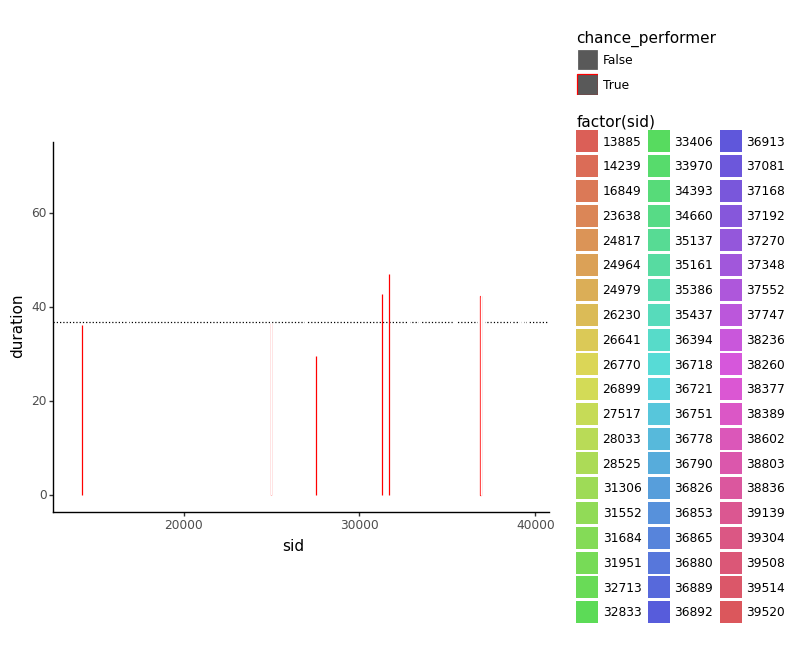

<ggplot: (109134178166)>


In [14]:
dur_dat = all_data.groupby(['sid', 'chance_performer']).aggregate('mean').reset_index()
print("Number of participants: {}".format(dur_dat.shape[0]))
print("Durations: {}".format(dur_dat['duration'].values.round()))

g = (gg.ggplot(dur_dat, gg.aes('sid', 'duration', fill='factor(sid)', color='chance_performer'))
     + gg.geom_hline(yintercept=np.mean(dur_dat['duration']), linetype='dotted')
     + gg.scale_color_manual(values=('white', 'red'))
     + gg.geom_bar(stat='identity')
#      + gg.theme(legend_position='none')
    )
g.save(os.path.join(plot_dir, '0_TaskDuration_all.png'))
print(g)

## Raw button presses

<ipython-input-15-78f51d9f8307>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 20 x 10 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\0_RawKeyPresses.png


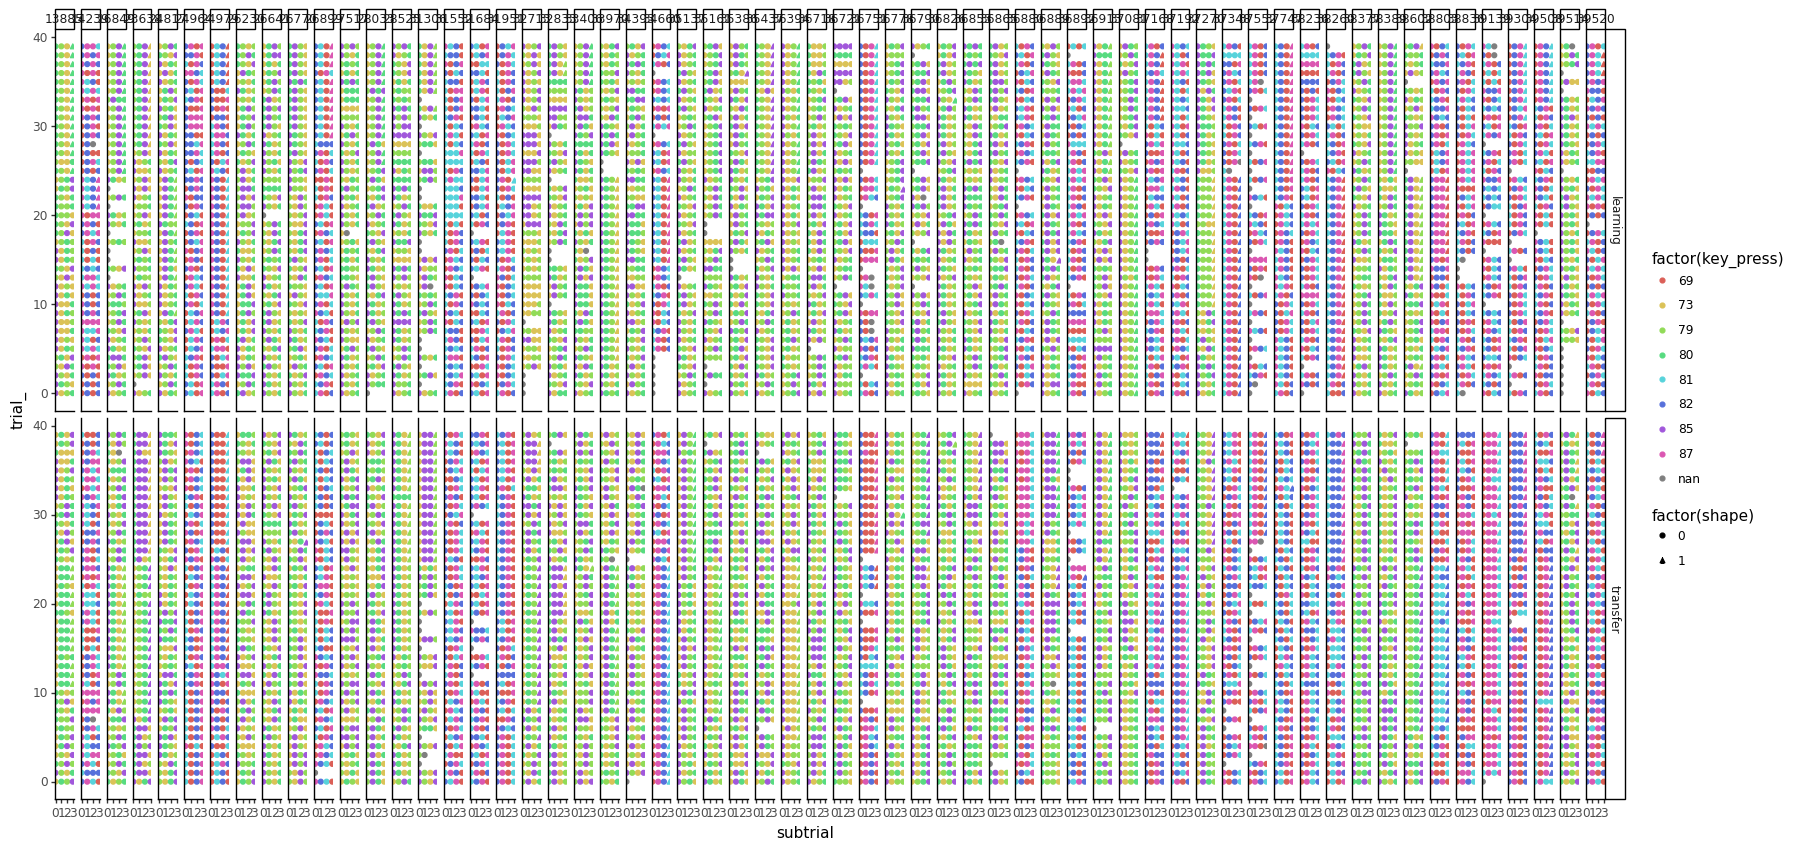

<ggplot: (109151649687)>


In [15]:
# Get data
sub_dat = all_data.loc[
    (all_data.phase == 'high')
    & (all_data.trial_ < 40) #& np.invert(np.isnan(all_data.key_press))
]
sub_dat['shape'] = sub_dat['acc'].apply(lambda x: 0 if np.isnan(x) or x == 0 else 1)

# Plot
gg.options.figure_size = (20, 10)
g = (gg.ggplot(sub_dat, gg.aes('subtrial', 'trial_', color='factor(key_press)', shape='factor(shape)'))
     + gg.geom_point()
     + gg.facet_grid('trial_type ~ sid', scales='free_x')
    )
g.save(os.path.join(plot_dir, '0_RawKeyPresses.png'))
print(g)
gg.options.figure_size = default_figure_size

## Points won over time

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 8 x 4 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\0_PointsOverTrials_all.png


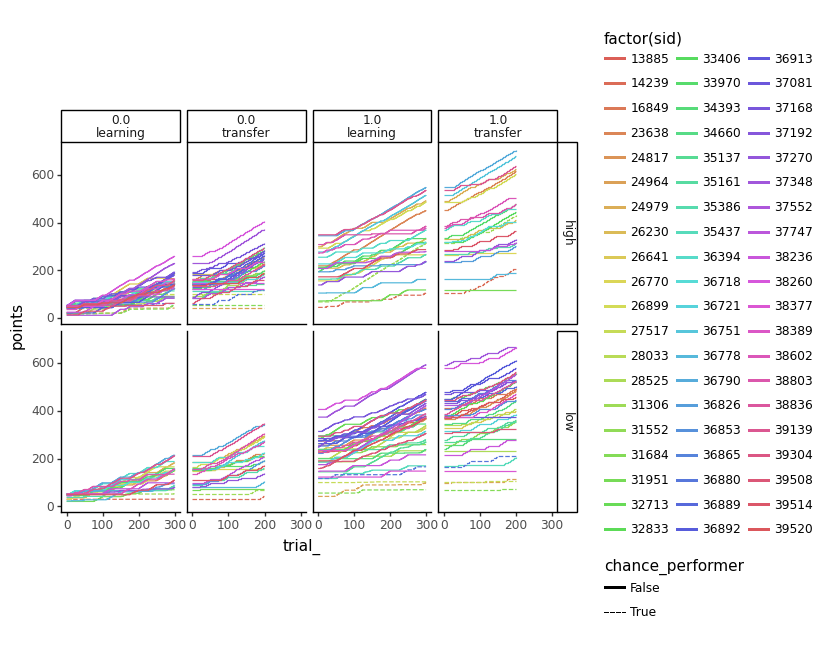

<ggplot: (109151642257)>

In [16]:
def plot_PointsOverTrials(dat, suf=''):
    
    gg.options.figure_size = (8, 4)
    g = (gg.ggplot(dat, gg.aes('trial_', 'points', color='factor(sid)', linetype='chance_performer'))
         + gg.geom_line()
         + gg.facet_grid('phase ~ phaseNum + trial_type')
        )
    g.save(os.path.join(plot_dir, '0_PointsOverTrials{}.png'.format(suf)))
    gg.options.figure_size = default_figure_size

    return g

# Use
# plot_PointsOverTrials(incl_data)
plot_PointsOverTrials(all_data, '_all')

## Response times

### Population-wide

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\1_RTOverSubtrial.png


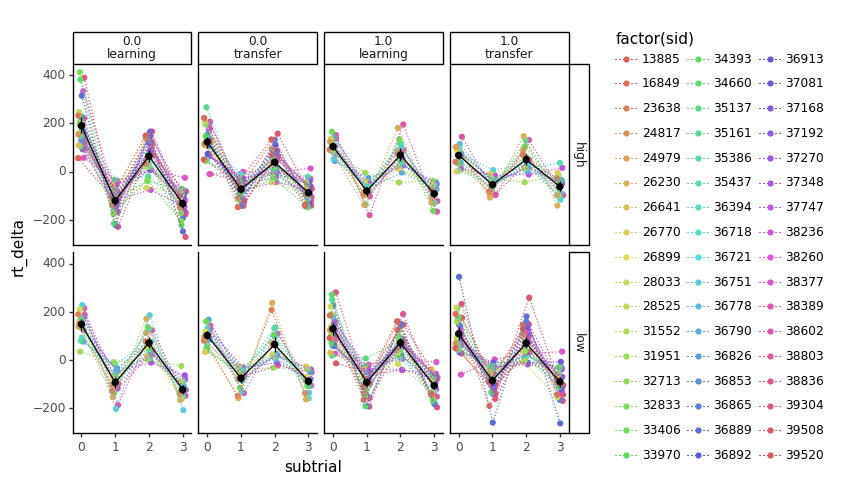

<ggplot: (109162100697)>


In [17]:
# Plot
g = (gg.ggplot(rt_sum, gg.aes('subtrial', 'rt_delta'))
     + gg.geom_point(gg.aes(color='factor(sid)'), position=gg.position_dodge(width=0.2))
     + gg.geom_line(gg.aes(color='factor(sid)'), position=gg.position_dodge(width=0.2), linetype='dotted')
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.facet_grid('phase ~ phaseNum + trial_type')
)
g.save(os.path.join(plot_dir, '1_RTOverSubtrial.png'))
print(g)

### Individuals

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\1_RTOverSubtrial_Details_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 1062 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 1062 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\1_RTOverSubtrial_Details.png
C:\Users\maria\Anaconda3\envs\

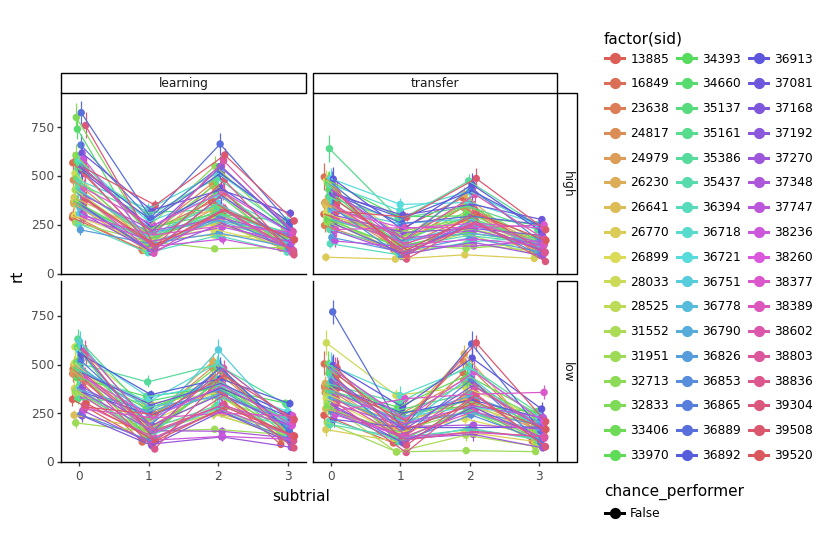

<ggplot: (109151500782)>

In [18]:
def plot_RTOverSubtrialDetails(dat, suf=''):
    
    g = (gg.ggplot(dat, gg.aes('subtrial', 'rt', color='factor(sid)', group='sid', linetype='chance_performer'))
         + gg.stat_summary(position=gg.position_dodge(width=0.2))
         + gg.stat_summary(position=gg.position_dodge(width=0.2), geom='line')
         + gg.facet_grid('phase ~ trial_type')
        )
    g.save(os.path.join(plot_dir, '1_RTOverSubtrial_Details{}.png'.format(suf)))
    
    return g

# Use
rts_all = plot_RTOverSubtrialDetails(all_data, '_all')
plot_RTOverSubtrialDetails(incl_data)

## Learning curves

### Individual participants

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\2_LearnCurves_Trial_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 178294 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 178294 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\2_LearnCurves_Trial.png
C:\Users\maria\Anaconda3\envs\notebo

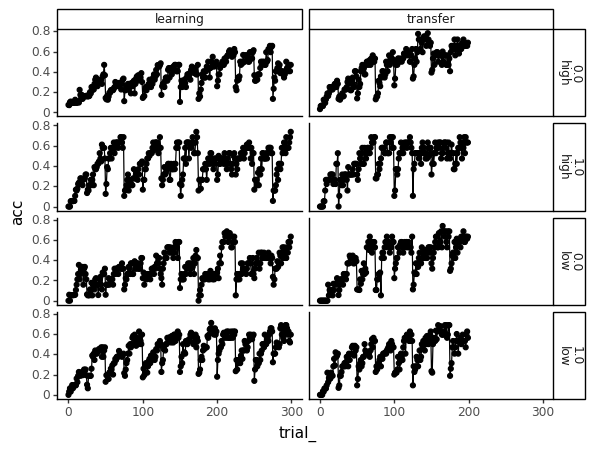

<ggplot: (109151517492)>

In [19]:
# Learning curves, averaging over goal stars 
def plot_LearnCurves_Trial(dat, suf=''):
    
    g = (gg.ggplot(dat, gg.aes('trial_', 'acc'))
         + gg.stat_summary(fun_y=np.mean, geom='point')
         + gg.stat_summary(fun_y=np.mean, geom='line')
         + gg.facet_grid('phase + phaseNum ~ trial_type')
        )
    g.save(os.path.join(plot_dir, '2_LearnCurves_Trial{}.png'.format(suf)))
    
    return g

# Use
learn_curves_all = plot_LearnCurves_Trial(all_data, '_all')
learn_curves = plot_LearnCurves_Trial(incl_data)
learn_curves

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\2_LearnCurves_Block.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 152016 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 152016 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 152016 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 152016 rows containing non-finite values.


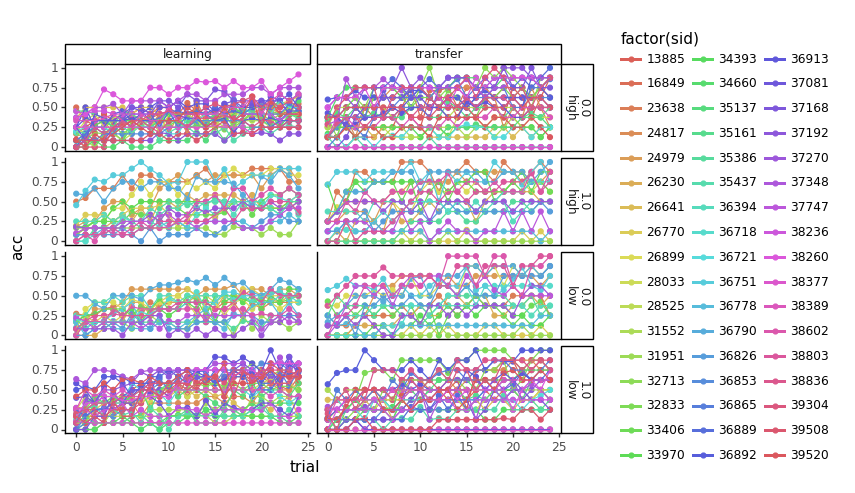

<ggplot: (109165234752)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\2_LearnCurves_Block_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 178294 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 178294 rows containing non-finite values.


In [20]:
# Learning curves, trial-by-trial
learn_curves2 = learn_curves + gg.aes(x='trial', color='factor(sid)')
learn_curves2.save(os.path.join(plot_dir, '2_LearnCurves_Block.png'))
print(learn_curves2)

learn_curves_all2 = learn_curves_all + gg.aes(x='trial', color='factor(sid)', linetype='chance_performer')
learn_curves_all2.save(os.path.join(plot_dir, '2_LearnCurves_Block_all.png'))

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\2_LearnCurves_Star.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 152016 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 152016 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 152016 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 152016 rows containing non-finite values.


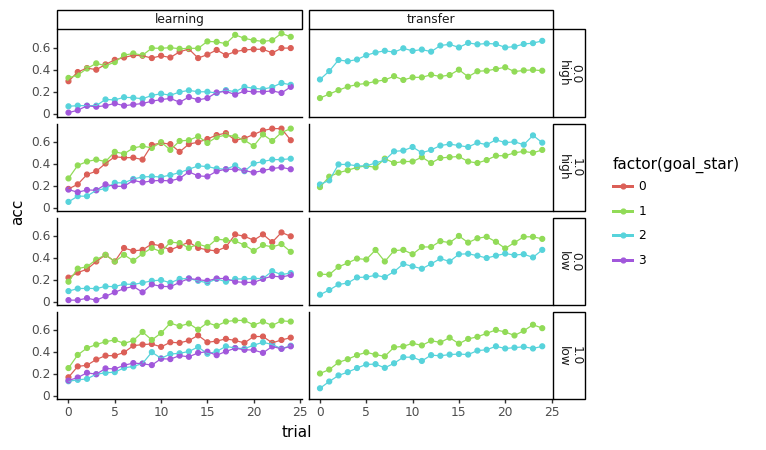

<ggplot: (109165249356)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\2_LearnCurves_Star_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 178294 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 178294 rows containing non-finite values.


In [21]:
# Learning curves, trial-by-trial
learn_curves3 = learn_curves + gg.aes(x='trial', color='factor(goal_star)')
learn_curves3.save(os.path.join(plot_dir, '2_LearnCurves_Star.png'))
print(learn_curves3)

learn_curves_all3 = learn_curves_all + gg.aes(x='trial', color='factor(goal_star)')
learn_curves_all3.save(os.path.join(plot_dir, '2_LearnCurves_Star_all.png'))

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 178294 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 178294 rows containing non-finite values.


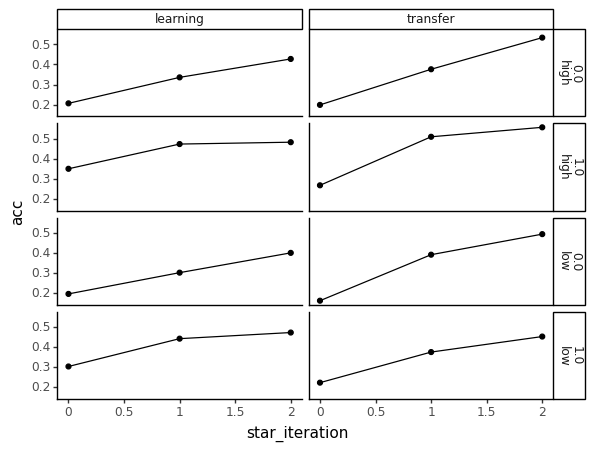

<ggplot: (109162257107)>

In [22]:
learn_curves_all4 = learn_curves_all + gg.aes(x='star_iteration')
learn_curves_all4

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 178294 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 178294 rows containing non-finite values.


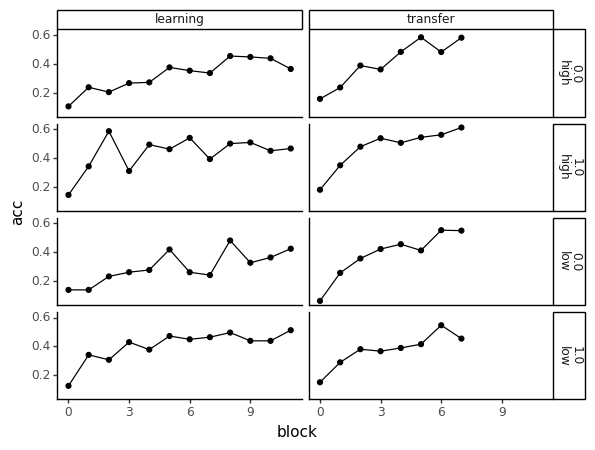

<ggplot: (109127846114)>

In [23]:
learn_curves_all5 = learn_curves_all + gg.aes(x='block')
learn_curves_all5

### Population average

In [24]:
id_cols = ['sid', 'trial_type', 'phase', 'phaseNum', 'trial']
learn_curves_sum = incl_data.groupby(id_cols).aggregate('mean').reset_index()[id_cols + ['acc']]
learn_curves_sum

sid trial_type phase  phaseNum  trial       acc
0     13885   learning  high       0.0    0.0  0.166667
1     13885   learning  high       0.0    1.0  0.250000
2     13885   learning  high       0.0    2.0  0.333333
3     13885   learning  high       0.0    3.0  0.416667
4     13885   learning  high       0.0    4.0  0.333333
...     ...        ...   ...       ...    ...       ...
5095  39520   transfer   low       1.0   20.0  0.750000
5096  39520   transfer   low       1.0   21.0  0.625000
5097  39520   transfer   low       1.0   22.0  0.625000
5098  39520   transfer   low       1.0   23.0  0.750000
5099  39520   transfer   low       1.0   24.0  0.625000

[5100 rows x 6 columns]

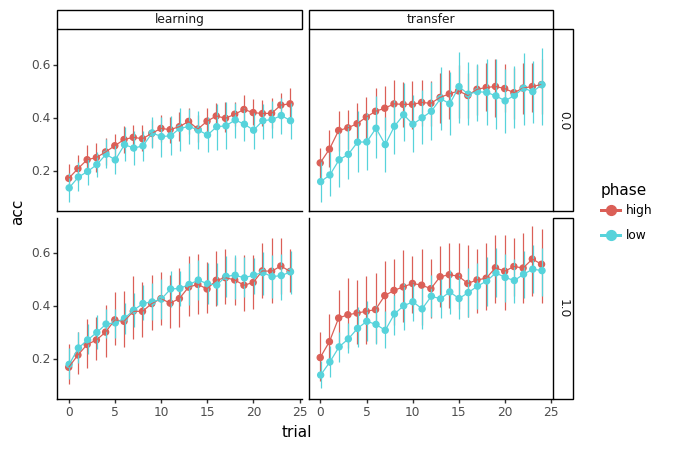

<ggplot: (109151630797)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\2_LearnCurves_BlockAvg.png


In [25]:
g = (gg.ggplot(learn_curves_sum, gg.aes('trial', 'acc', color='phase'))
     + gg.stat_summary(position=gg.position_dodge(width=0.1))
     + gg.stat_summary(position=gg.position_dodge(width=0.1), geom='line')
     + gg.facet_grid('phaseNum ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '2_LearnCurves_BlockAvg.png'))

## Performance by star

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\3_PerformanceByStar_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\3_PerformanceByStar.png


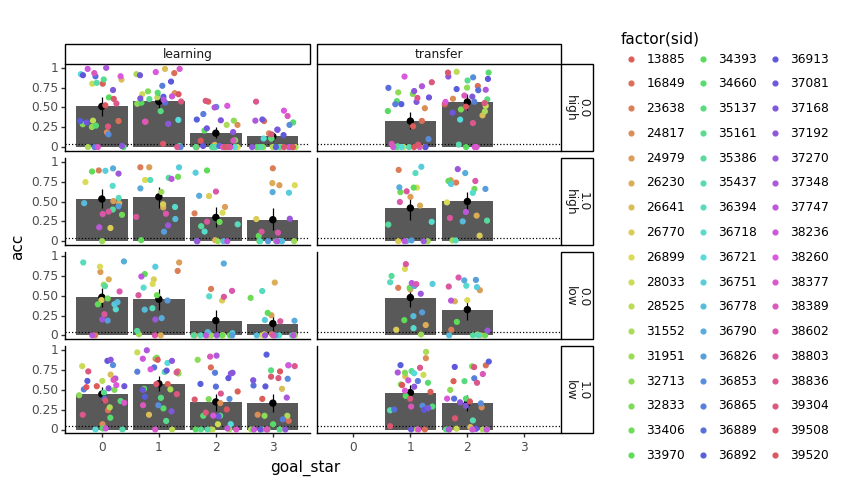

<ggplot: (109162864135)>

In [26]:
def plot_PerformanceByStar(dat, suf=''):
    
    id_cols = ['sid', 'phase', 'phaseNum', 'trial_type', 'goal_star']
    sum_dat = dat.groupby(id_cols).mean().reset_index()[id_cols + ['acc']]
    
    chance_perf = 1 / (4 * 3 * 2)
    g = (gg.ggplot(sum_dat, gg.aes('goal_star', 'acc'))
         + gg.stat_summary(geom='bar')
         + gg.stat_summary()
         + gg.geom_hline(yintercept=chance_perf, linetype='dotted')
         + gg.geom_point(gg.aes(color='factor(sid)'), position='jitter')
         + gg.facet_grid('phase + phaseNum ~ trial_type')
        )
    g.save(os.path.join(plot_dir, '3_PerformanceByStar{}.png'.format(suf)))
    
    return g

# Use
plot_PerformanceByStar(all_data, '_all')
plot_PerformanceByStar(incl_data)

## Collecting the wrong star

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\4_CollectingWrongStar_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\4_CollectingWrongStar.png


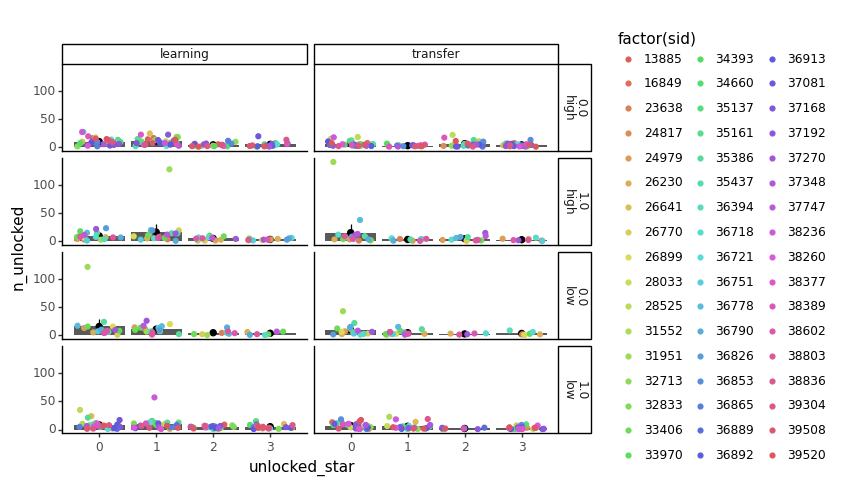

<ggplot: (109153387948)>

In [27]:
def plot_CollectingWrongStar(dat, suf=''):
    
    # Get data
    id_cols = ['sid', 'phase', 'phaseNum', 'trial_type', 'unlocked_star']
    sub_dat = dat.loc[dat.correct == 0].reset_index()
    sum_dat = sub_dat.groupby(id_cols).count().reset_index()[id_cols + ['index']]
    sum_dat = sum_dat.rename(columns={'index': 'n_unlocked'})
    sum_dat.loc[np.isnan(sum_dat.n_unlocked), 'n_unlocked'] = 0
    
    # Plot
    g = (gg.ggplot(sum_dat, gg.aes('unlocked_star', 'n_unlocked'))
         + gg.stat_summary(geom='bar')
         + gg.stat_summary()
         + gg.geom_point(gg.aes(color='factor(sid)'), position='jitter')
         + gg.facet_grid('phase + phaseNum ~ trial_type')
        )
    g.save(os.path.join(plot_dir, '4_CollectingWrongStar{}.png'.format(suf)))
    
    return g

# Use
plot_CollectingWrongStar(all_data, '_all')
plot_CollectingWrongStar(incl_data)

## Perseverance: Following old rules after transfer

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\5_PerseveranceLowRules_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\5_PerseveranceLowRules.png


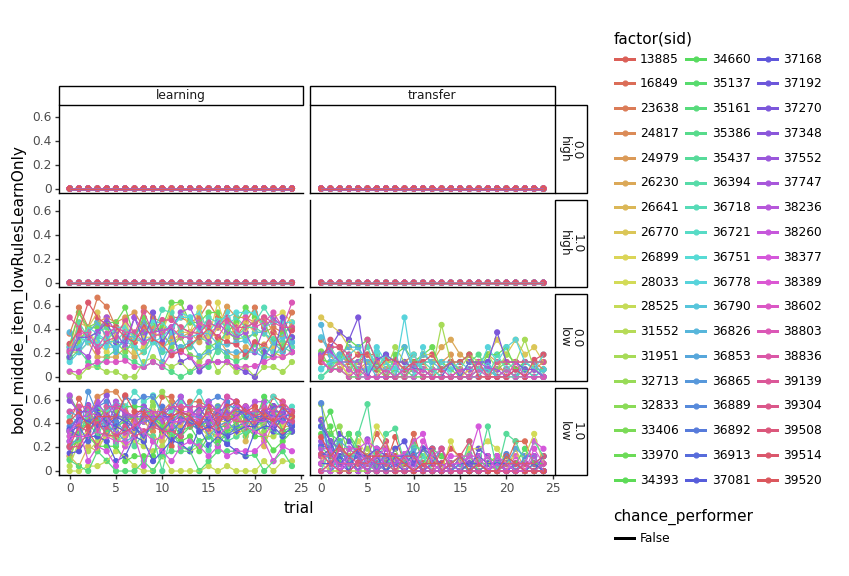

<ggplot: (109151549248)>

In [28]:
def plot_PerseveraceLowRules(dat, suf=''):
    
    g = (gg.ggplot(dat, gg.aes('trial', 'bool_middle_item_lowRulesLearnOnly', color='factor(sid)', linetype='chance_performer'))
         + gg.stat_summary(fun_y=np.mean, geom='point')
         + gg.stat_summary(fun_y=np.mean, geom='line')
         + gg.facet_grid('phase + phaseNum ~ trial_type')
        )
    g.save(os.path.join(plot_dir, '5_PerseveranceLowRules{}.png'.format(suf)))
    
    return g

# Use
sub_dat = all_data.loc[all_data.subtrial.isin([1, 3])]
pers_all = plot_PerseveraceLowRules(sub_dat, '_all')
pers = plot_PerseveraceLowRules(sub_dat.loc[np.invert(sub_dat['chance_performer'])])
pers

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\5_PerseveranceHighRules_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\5_PerseveranceHighRules.png


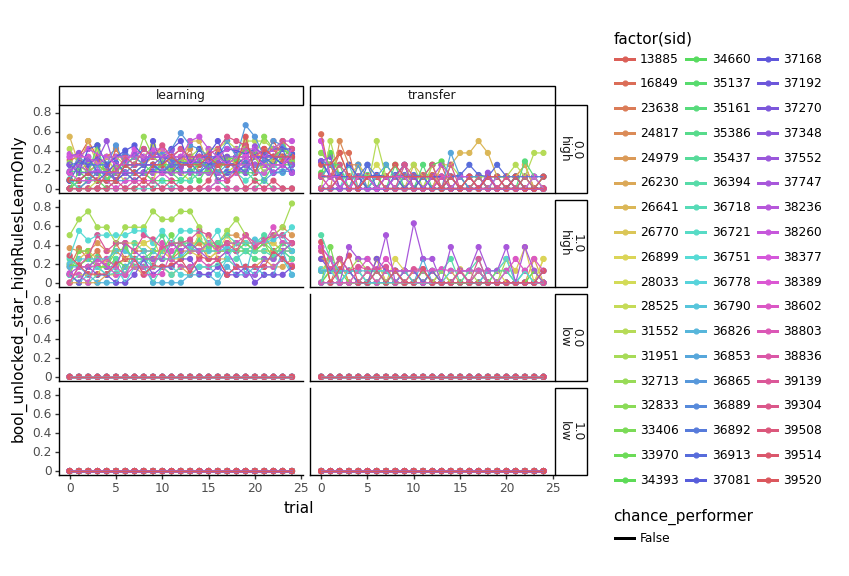

<ggplot: (109151478917)>


In [29]:
pers_all2 = pers_all + gg.aes(y='bool_unlocked_star_highRulesLearnOnly')
pers_all2.data = pers_all.data.loc[pers_all.data.subtrial == 3]
pers_all2.save(os.path.join(plot_dir, '5_PerseveranceHighRules_all.png'))

pers2 = pers + gg.aes(y='bool_unlocked_star_highRulesLearnOnly')
pers2.data = pers.data.loc[pers.data.subtrial == 3]
pers2.save(os.path.join(plot_dir, '5_PerseveranceHighRules.png'))
print(pers2)

## Analyzing performance by level

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\6_DetailsLowTransferRules_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\6_DetailsLowTransferRules.png


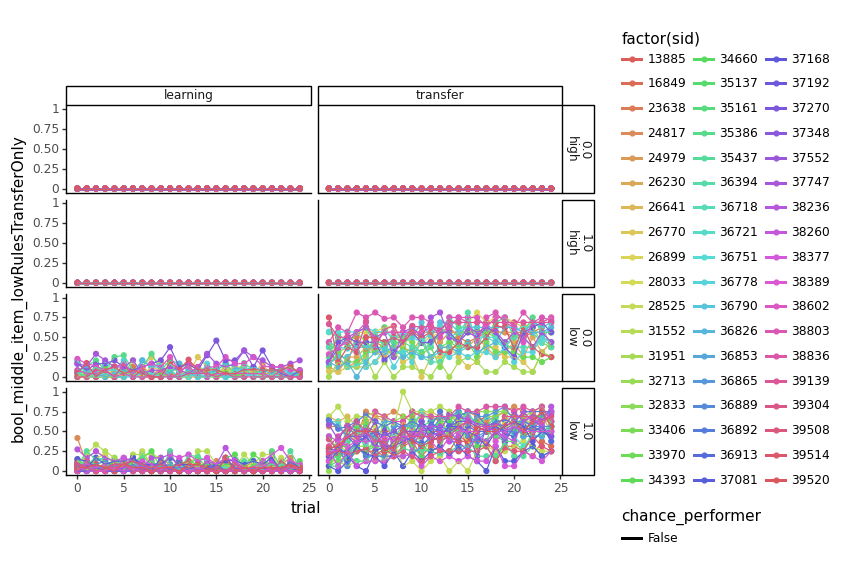

<ggplot: (109151537917)>

In [30]:
pers_all3 = pers_all + gg.aes(y='bool_middle_item_lowRulesTransferOnly')
pers_all3.save(os.path.join(plot_dir, '6_DetailsLowTransferRules_all.png'))

pers3 = pers + gg.aes(y='bool_middle_item_lowRulesTransferOnly')
pers3.save(os.path.join(plot_dir, '6_DetailsLowTransferRules.png'))
pers3

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\6_DetailsHighTransferRules_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\6_DetailsHighTransferRules.png


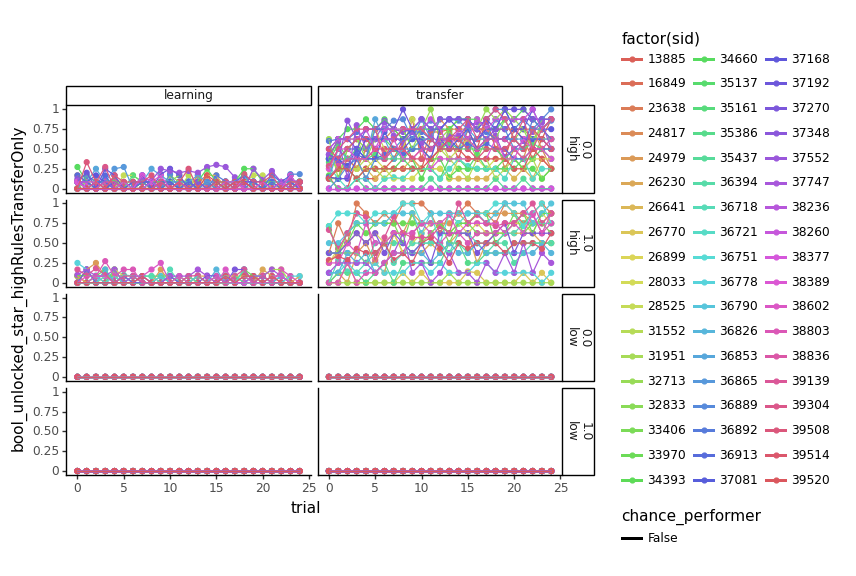

<ggplot: (109162289936)>

In [31]:
pers_all4 = pers_all2 + gg.aes(y='bool_unlocked_star_highRulesTransferOnly')
pers_all4.save(os.path.join(plot_dir, '6_DetailsHighTransferRules_all.png'))

pers4 = pers2 + gg.aes(y='bool_unlocked_star_highRulesTransferOnly')
pers4.save(os.path.join(plot_dir, '6_DetailsHighTransferRules.png'))
pers4

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\6_DetailsLowBothRules_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\6_DetailsLowBothRules.png


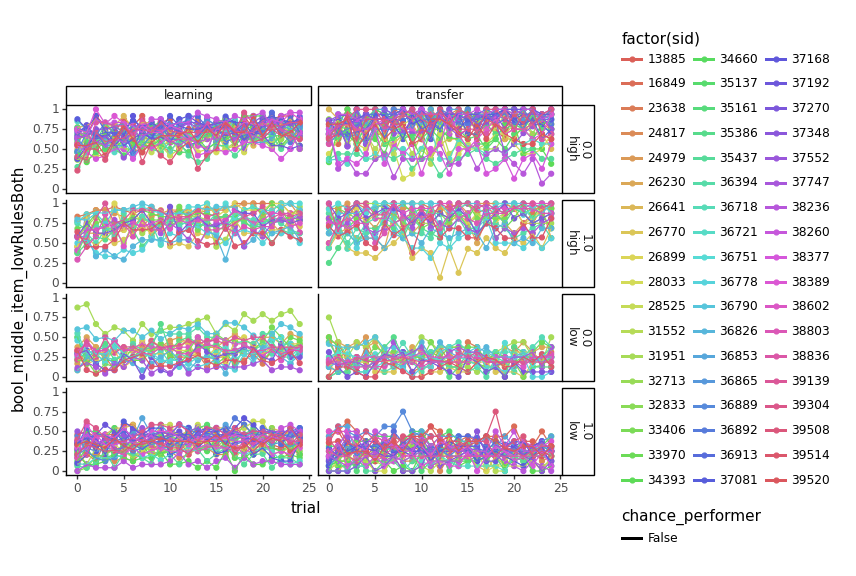

<ggplot: (109162122454)>

In [32]:
pers_all6 = pers_all + gg.aes(y='bool_middle_item_lowRulesBoth')
pers_all6.save(os.path.join(plot_dir, '6_DetailsLowBothRules_all.png'))

pers6 = pers + gg.aes(y='bool_middle_item_lowRulesBoth')
pers6.save(os.path.join(plot_dir, '6_DetailsLowBothRules.png'))
pers6

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\6_DetailsHighBothRules_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\6_DetailsHighBothRules.png


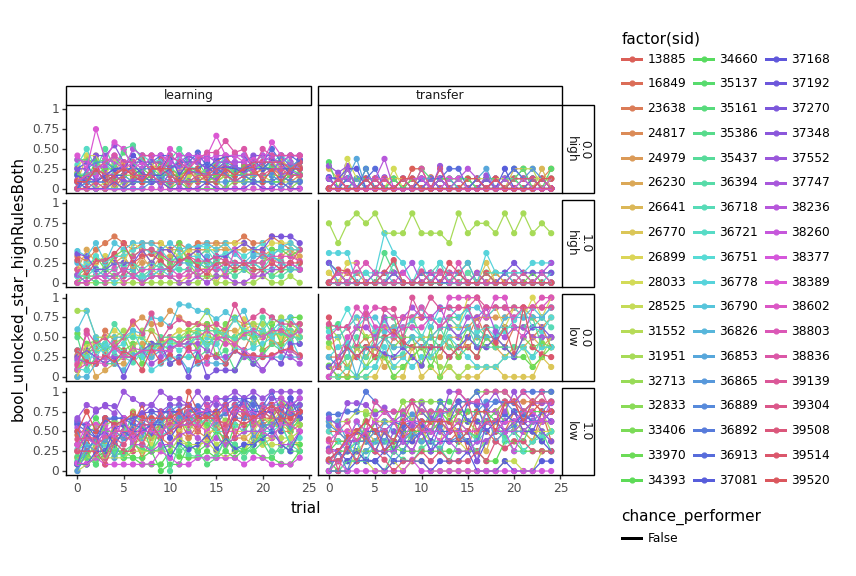

<ggplot: (109162023223)>

In [33]:
pers_all5 = pers_all2 + gg.aes(y='bool_unlocked_star_highRulesBoth')
pers_all5.save(os.path.join(plot_dir, '6_DetailsHighBothRules_all.png'))

pers5 = pers2 + gg.aes(y='bool_unlocked_star_highRulesBoth')
pers5.save(os.path.join(plot_dir, '6_DetailsHighBothRules.png'))
pers5

## Time frame for learning low / high rules

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\7_TimeFrameLearnRulesLowLearn_all
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\7_TimeFrameLearnRulesLowLearn
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\7_TimeFrameLearnRulesLowTrans_all
C:\Users\maria\Anaconda

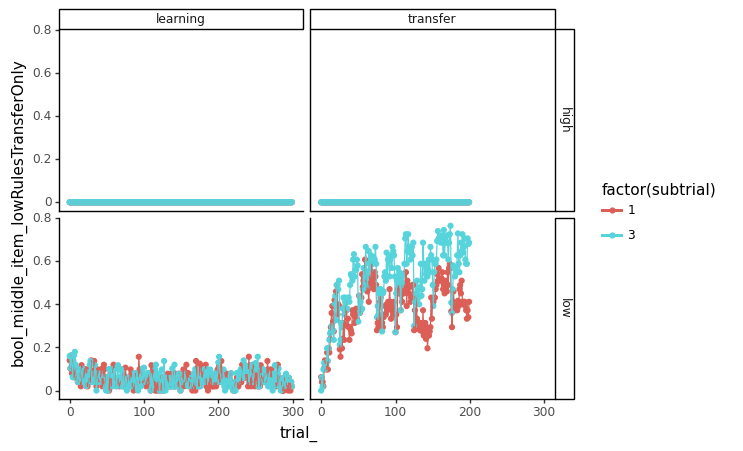

<ggplot: (109129945736)>

In [34]:
# How fast are low rules learnt? How many middle-items are produced through learning?
def plot_TimeframeLearnRules(dat, suf):
    
    # Get data
    if 'Low' in suf:
        sub_dat = dat.loc[dat['subtrial'].isin([1, 3])]  # Select subtrials 1 and 3, in which middle-items *can* appear
        y = 'bool_middle_item_lowRulesLearnOnly'
        if 'Trans' in suf:
            y = 'bool_middle_item_lowRulesTransferOnly'

    elif 'High' in suf:
        sub_dat = all_data.loc[all_data['subtrial'] == 3]  # Select subtrial 3, in which stars *can* appear
        y = 'bool_unlocked_star_highRulesLearnOnly'
        if 'Trans' in suf:
            y = 'bool_unlocked_star_highRulesTransferOnly'
    else:
        raise(ValueError, 'suf must contain either "Low", or "High".')

    # Plot
    g = (gg.ggplot(sub_dat, gg.aes('trial_', y, color='factor(subtrial)'))
         + gg.stat_summary(fun_y=np.mean, geom='point')
         + gg.stat_summary(fun_y=np.mean, geom='line')
         + gg.facet_grid('phase ~ trial_type')
        )
    g.save(os.path.join(plot_dir, '7_TimeFrameLearnRules{}'.format(suf)))
    
    return g

# Use
plot_TimeframeLearnRules(all_data, 'LowLearn_all')
plot_TimeframeLearnRules(incl_data, 'LowLearn')
plot_TimeframeLearnRules(all_data, 'LowTrans_all')
plot_TimeframeLearnRules(incl_data, 'LowTrans')

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\7_TimeFrameLearnRulesHighLearn_all
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\7_TimeFrameLearnRulesHighLearn
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\7_TimeFrameLearnRulesHighTrans_all
C:\Users\maria\Anaco

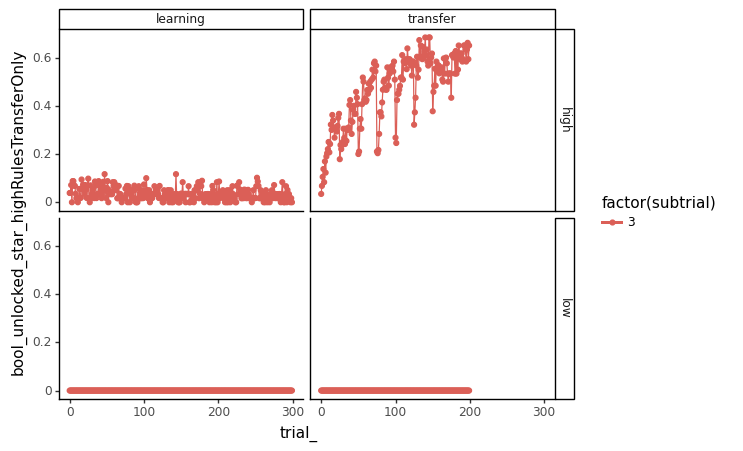

<ggplot: (109165829021)>

In [35]:
plot_TimeframeLearnRules(all_data, 'HighLearn_all')
plot_TimeframeLearnRules(incl_data, 'HighLearn')
plot_TimeframeLearnRules(all_data, 'HighTrans_all')
plot_TimeframeLearnRules(incl_data, 'HighTrans')

## Overall rules in training / transfer high / low

In [36]:
# # Hypothesis: Previous rules (high-level or low-level) persist significantly after they stop being valuable
# # (compared to baseline of not-yet-learned rules). There is a difference between high- and low-level (especially
# # early-on, i.e., in the first few blocks).
# g = (gg.ggplot(item_sum_dat, gg.aes('trial_type', color='factor(sid)', group='factor(sid)'))
#      + gg.geom_point()
#      + gg.geom_line()
#      + gg.facet_grid('phaseNum ~ phase')
#     )

# for col in goal_cols:
#     name = col.split('_')[-1]
#     g_col = g + gg.aes(y=col)
#     g_col.save(os.path.join(plot_dir, '8_Performance{}.png'.format(name)))
#     print(g_col)

## RT zigzag pattern

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\9_CorrelationRtzigzagPerformance.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


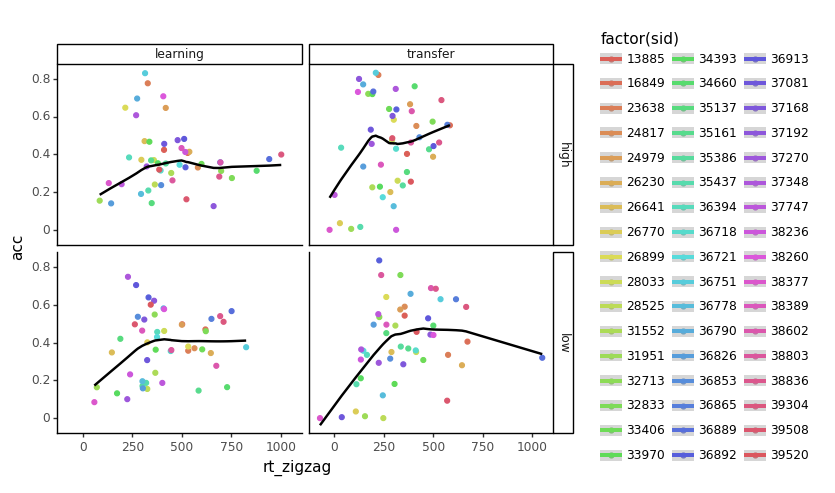

<ggplot: (109153373832)>


In [37]:
g = (gg.ggplot(rt_wide, gg.aes('rt_zigzag', 'acc', color='factor(sid)'))
     + gg.geom_point()
     + gg.geom_smooth(group=1)
     + gg.facet_grid('phase ~ trial_type')
    )
g.save(os.path.join(plot_dir, '9_CorrelationRtzigzagPerformance.png'))
print(g)

In [38]:
g = (gg.ggplot(gg.aes('rt_zigzag', color='factor(sid)'))
     + gg.geom_point()
#      + gg.geom_line()
     + gg.geom_smooth(group=1)
     + gg.facet_grid('~ trial_type')
    )

for col in goal_cols:
    name = col.split('_')[-1]
    g_col = g + gg.aes(y=col)
    
    if 'Trans' in col:
        g_col.data = rt_wide.loc[(rt_wide.trial_type == 'transfer') & (rt_wide[col] != 0)]
    else:
        g_col.data = rt_wide.loc[rt_wide.trial_type == 'learning']

    g_col.save(os.path.join(plot_dir, '9_CorrelationRtzigzag{}.png'.format(name)))
    print(g_col)

NameError: name 'goal_cols' is not defined

## Forgetting of old rules and learning of new rules during transfer

In [ ]:
id_cols = ['sid', 'phase', 'trial_type', 'block']
sum_rules = incl_data.loc[incl_data.subtrial.isin([1, 3]), id_cols + goal_cols].groupby(id_cols).aggregate('mean').reset_index()
sum_rules = sum_rules.melt(id_vars=id_cols, var_name='rule', value_name='acc')
sum_rules.loc[sum_rules.rule.isin([c for c in set(sum_rules.rule) if 'high' in c]), 'acc'] *= 2
sum_rules

In [ ]:
# Hypothesis: middle-layer items are easier (faster) to learn, but harder (slower) to unlearn than high-level stars
# Reason: There is a difference in the level of abstraction. The deeper down, the harder to unlearn. Maybe only
# the top-level is still malleable.
g = (gg.ggplot(gg.aes('block', 'acc', color='rule'))
     + gg.stat_summary(position=gg.position_dodge(width=0.1))
     + gg.stat_summary(position=gg.position_dodge(width=0.1), geom='line')
     + gg.coord_cartesian(ylim=(0, 1))
     + gg.facet_grid('phaseNum ~ phase + trial_type')
    )

g_high = g
g_high.data = sum_rules.loc[
    sum_rules.rule.isin([c for c in set(sum_rules.rule) if 'high' in c]) &
    (sum_rules.phase == 'high') #& (sum_rules.trial_type == 'transfer')
]
g_high.save(os.path.join(plot_dir, '10_ForgettingRelearningHighRules.png'))
print(g_high)

g_low = g
g_low.data = sum_rules.loc[
    sum_rules.rule.isin([c for c in set(sum_rules.rule) if 'low' in c]) &
    (sum_rules.phase == 'low') #& (sum_rules.trial_type == 'transfer')
]
g_low.save(os.path.join(plot_dir, '10_ForgettingRelearninglowRules.png'))
print(g_low)

## RT pattern || behavior on a single-block level

In [ ]:
gg.options.figure_size = (10, 7)
g = (gg.ggplot(rt_wide_block, gg.aes('block', 'rt_zigzag', color='factor(sid)', shape='factor(goal_star)', linetype='chance_performer'))
     + gg.geom_point(gg.aes(size='acc'), position=gg.position_dodge(width=0.5))
     + gg.geom_line(gg.aes(group='factor(sid)'), position=gg.position_dodge(width=0.5))
     + gg.facet_grid('phase ~ trial_type')
    )
g.save(os.path.join(plot_dir, '11_RtzigzagOverBlocks.png'))
print(g)
gg.options.figure_size = default_figure_size

In [ ]:
g = (gg.ggplot(rt_wide_block,
               gg.aes('acc', 'rt_zigzag', color='factor(sid)', linetype='chance_performer',
                      alpha='block', shape='factor(goal_star)', group='factor(sid)'))
     + gg.geom_point()
     + gg.geom_smooth()
     + gg.facet_grid('phase ~ trial_type')
    )
g.save(os.path.join(plot_dir, '11_RtzigzagAcc_0.png'))

g2 = g
g2.data = rt_wide_block.loc[rt_wide_block.acc > 0]
g2.save(os.path.join(plot_dir, '11_RtzigzagAcc.png'))
g2

In [ ]:
# RT zigzag supports learning middle-layer items: no zigzag = no middle-layer items
# lots of zigzag = intermediate performance (learning); no zigzag = perfect performance (no distrimination)
gll = g + gg.aes(x='bool_middle_item_lowRulesLearnOnly')
gll.save(os.path.join(plot_dir, '11_RtzigzagLoWRulesLearn.png'))
gll

In [ ]:
# ???
glt = g + gg.aes(x='bool_middle_item_lowRulesTransferOnly')
glt.save(os.path.join(plot_dir, '11_RtzigzagLoWRulesTransfer.png'))
glt

In [ ]:
# Good star performance comes AFTER learning middle-layer items => when RT zigzag is gone completely.
ghl = g + gg.aes(x='bool_unlocked_star_highRulesLearnOnly')
ghl.save(os.path.join(plot_dir, '11_RtzigzagHighRulesLearn.png'))
ghl

In [ ]:
# High-level transfer does NOT require relearning middle-layer sequences
# => RT zigzag occurs in the beginning, when trying out different middle-layer sequences, and then dies out as we learn them
ght = g + gg.aes(x='bool_unlocked_star_highRulesTransferOnly')
ght.save(os.path.join(plot_dir, '11_RtzigzagHighRulesTransfer.png'))
ght

In [ ]:
# There is more extra zigzag during low transfer than high transfer
# => Because middle-layer items needs to be re-learned
g = (gg.ggplot(rt_wide_block, gg.aes('factor(star_iteration)', 'rt_zigzag', color='phase', group='phase'))
#      + gg.geom_point(gg.aes(color='factor(sid)', size='acc'), position=gg.position_dodge(width=0.2))
#      + gg.geom_line(gg.aes(color='factor(sid)'), position=gg.position_dodge(width=0.2), linetype='dotted')
     + gg.stat_summary(position=gg.position_dodge(width=0.1))
     + gg.stat_summary(position=gg.position_dodge(width=0.1), geom='line')
#      + gg.facet_grid('phase + goal_star ~ trial_type', labeller='label_context')
     + gg.facet_grid('phaseNum ~ trial_type', labeller='label_context')
    )
g.save(os.path.join(plot_dir, '11_RtzigzagOverStarIteration.png'))
print(g)

# Basic group-level stuff

In [ ]:
# People are worse at their first learning phase (phaseNum: 0.0) than at their second (phaseNum: 1.0)
# But either way, they are worse at low transfer (blue) than high transfer (red)
g = (gg.ggplot(rt_wide, gg.aes('trial_type', '1-acc', fill='phase'))
     + gg.stat_summary(geom='bar', position=gg.position_dodge(width=0.9))
     + gg.stat_summary(position=gg.position_dodge(width=0.9))
     + gg.facet_grid('~ phaseNum', labeller='label_both')
     + gg.labs(x='', color='')
    )
g.save(os.path.join(plot_dir, '12_AverageAcc.png'))
print(g)

In [ ]:
# People are worse at their first learning phase (phaseNum: 0.0) than at their second (phaseNum: 1.0), especially early-on
# But either way, they are worse at low transfer (blue) than high transfer (red), throughout
gb = (gg.ggplot(rt_wide_block, gg.aes('block', '1-acc', color='phase'))
     + gg.stat_summary(position=gg.position_dodge(width=0.2))
     + gg.stat_summary(position=gg.position_dodge(width=0.2), geom='line')
     + gg.facet_grid('phaseNum ~ trial_type', labeller='label_both', scales='free_x')
     + gg.labs(x='', color='')
    )
gb.save(os.path.join(plot_dir, '12_AverageAcc_block.png'))
print(gb)

In [ ]:
# Same for RT zigzag: People zigzag more in their first than second learning phase (driven by overall slower RTS?!?!)
# Overall more zigzag in low than high transfer
gzz = g + gg.aes(y='rt_zigzag')
gzz.save(os.path.join(plot_dir, '12_AverageRtzigzag.png'))
print(gzz)

In [ ]:
bfzz = gb + gg.aes(y='rt_zigzag')
bfzz.save(os.path.join(plot_dir, '12_AverageRtzigzag_block.png'))
print(bfzz)

In [ ]:
grt = g + gg.aes(y='rt')
grt.save(os.path.join(plot_dir, '12_AverageRt.png'))
print(grt)

In [ ]:
bfrt = gb + gg.aes(y='rt')
bfrt.save(os.path.join(plot_dir, '12_AverageRt_block.png'))
print(bfrt)

In [ ]:
l = rt_wide.loc[rt_wide.trial_type == 'learning'].drop(columns=['trial_type'], axis=1)
t = rt_wide.loc[rt_wide.trial_type == 'transfer'].drop(columns=['trial_type'], axis=1)
lt = pd.merge(l, t, on=['sid', 'chance_performer', 'phase', 'phaseNum'], suffixes=('_learn', '_transfer'))
for col in ['acc', 'rt_zigzag']:
    lt['{}_transfer_minus_learn'.format(col)] = lt['{}_transfer'.format(col)] - lt['{}_learn'.format(col)] 
lt

In [ ]:
g = (gg.ggplot(lt, gg.aes('phase', '-acc_transfer_minus_learn', color='factor(sid)'))
     + gg.stat_summary(geom='bar', color='white')
     + gg.stat_summary(color='black')
     + gg.geom_point(position=gg.position_dodge(width=0.1))
     + gg.geom_line(gg.aes(group='factor(sid)'), position=gg.position_dodge(width=0.1))
     + gg.labs(x='', y='<- learning worse acc <-> transfer worse ->')
     + gg.facet_grid('~ phaseNum')
    )
g.save(os.path.join(plot_dir, '12_DifferenceAcc.png'))
print(g)

In [ ]:
l = rt_wide_block.loc[rt_wide_block.trial_type == 'learning'].drop(columns=['trial_type'], axis=1)
t = rt_wide_block.loc[rt_wide_block.trial_type == 'transfer'].drop(columns=['trial_type'], axis=1)
lt_block = pd.merge(l, t, suffixes=('_learn', '_transfer'),
                    on=['sid', 'chance_performer', 'phase', 'phaseNum', 'block'])
for col in ['acc', 'rt_zigzag']:
    lt_block['{}_transfer_minus_learn'.format(col)] = lt_block['{}_transfer'.format(col)] - lt_block['{}_learn'.format(col)] 
lt_block

In [ ]:
gb = (gg.ggplot(lt_block, gg.aes('block', '-acc_transfer_minus_learn', color='factor(sid)'))
     + gg.stat_summary(geom='bar', color='white')
     + gg.stat_summary(geom='line', color='black')
     + gg.stat_summary(color='black')
#      + gg.geom_point(position=gg.position_dodge(width=0.1))
#      + gg.geom_line(gg.aes(group='factor(sid)'), position=gg.position_dodge(width=0.1))
     + gg.labs(x='', y='<- learning worse acc <-> transfer worse ->')
     + gg.facet_grid('phaseNum ~ phase')
    )
gb.save(os.path.join(plot_dir, '12_DifferenceAcc.png'))
print(gb)

In [ ]:
grt = g + gg.aes(y='rt_zigzag_transfer_minus_learn') + gg.labs(y='<- learning more zigzag <-> transfer more ->')
grt.save(os.path.join(plot_dir, '12_DifferenceRtzigzag.png'))
print(grt)

In [ ]:
grtb = gb + gg.aes(y='rt_zigzag_transfer_minus_learn')
grtb